<a href="https://colab.research.google.com/github/Daniel9215/MCD/blob/main/Script_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN 1 -  Análisis cuantitativo

Integrantes del grupo:
* Mary Yuliana Jaramillo
* Daniel Alejandro Rengifo
* Melina Imbachi
* Juan Fernando Gómez

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
import statsmodels.api as sm
from scipy.stats import kendalltau, pearsonr, spearmanr, jarque_bera, shapiro,ttest_1samp, kstest
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Cargamos todos los archivos necesarios

In [3]:
### Esta línea descargar los archivos del examen a la carpeta del Colab.
!npx degit HanisDad95/TalleresMSc -f

npx: installed 1 in 1.96s
> destination directory is not empty. Using --force, continuing
> cloned HanisDad95/TalleresMSc#HEAD


In [4]:
data1 = pd.read_excel('/content/data_exam1.xlsx', sheet_name='data1')
data2 = pd.read_excel('/content/data_exam1.xlsx', sheet_name='data2')
wine_q = pd.read_excel('/content/datos.xls', sheet_name = 'Wine Quality', skiprows = 2)

## Punto 1A


<Axes: xlabel='Ind', ylabel='Y'>

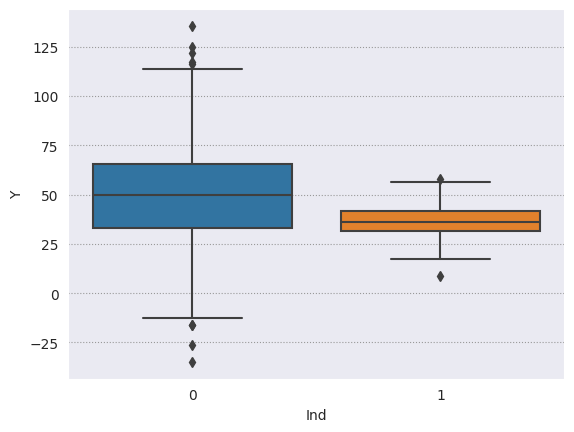

In [5]:
sns.boxplot(x = data1['Ind'], y = data1['Y'])

"En el análisis de la variable cualitativa, se observa que el nivel medio se ve afectado en la variable respuesta, al diferenciar la variable categórica entre 0 y 1. Esto induce un cambio en el nivel base. A continuación, se detalla la mediana de las variables y - x cuando toman valores de 0 y 1."

In [6]:
media_Ind = data1.groupby('Ind').median()
media_Ind

,Y,X
Ind,,
0,49.562809,9.873947
1,36.079339,10.118529


Ahora bien, para saber si se puede correr un modelo de regresion bajo el contexto planteado, se hace necesario plantear una pruaba de hipótesis para validar si hay relación entre las variables:

Ho: No hay correlación entre las variables (𝜌=0)

Ha: Existe correlación entre las variables (𝜌≠0)

En tal sentido, podemos rechazar la hipótesis nula. Por tanto, con una confianza del 95% podemos afirmar que la correlación entre las variables existe. y es fuerte

In [8]:
from scipy.stats import pearsonr
Coef,vp=pearsonr(data1["Y"],data1["X"])
print(f'Coeficiente de correlación= {Coef}, Valor-p= {vp}')

Coeficiente de correlación= 0.832056778224942, Valor-p= 1.1079584655802099e-257


Modelo de Regresión

In [9]:
import statsmodels.api as sm
X = data1[['X','Ind']]
y = data1['Y']
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.25e-308
Time:                        15:20:23   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7873      0.984      0.800      0.4

# Interpretación del Modelo

## Bondad de Ajuste:

 Prob (F-statistic): 2.25e-308 el modelo global es estadísticamente significativo. Tiene capacidad predictiva ya que la variable independiente contribuye significativamente a la predicción de la variable dependiente.



Adj. R-squared:0.758 es bastante alto y sugiere que tiene un buen poder explicativo en términos relativos.

P-Valor: Sugiere que la variable independiente es significativa al 99% y predice el comportamiento de la variable dependiente.

## Pruebas de Diagnóstico:

Durbin -Watson: no hay autocorrelación significativa en los residuos menor a 2

Omnibus: La prueba Omnibus no encuentra evidencia significativa de no normalidad en los residuos (p-value = 0.284).

Cond. No.: El número de condición es 31.7, indicando cierta multicolinealidad.

Prob(JB): es 0.295. Dado que este valor es mayor que el nivel de significancia comúnmente utilizado de 0.05, no hay evidencia suficiente para rechazar la hipótesis nula de normalidad de los residuos. En otras palabras, basándonos en el p-valor proporcionado, no hay suficiente evidencia para concluir que los residuos no sigan una distribución normal.

## Coeficientes:

Coeficiente X= en promedio, un incremento de una unidad en la variable independiente X esta asociado con un incremento de 4.9 unidades en promedio de Y

Ind: El coeficiente asociado con la variable 'Ind' es -14.1796 y es altamente significativo (p-value < 0.001). Esto indica que, manteniendo 'X' constante, la categoría 'Ind' se asocia con una disminución promedio de 14.1796 unidades en la variable dependiente en comparación con la categoría de referencia.

const (intercepto): El coeficiente asociado con la constante (intercepto) es 0.7873, pero no es estadísticamente significativo (p-value = 0.424). Esto sugiere que no hay evidencia suficiente para afirmar que la variable dependiente tiene un valor distinto de cero cuando todas las variables independientes son cero

## Prueba de Shapiro-Wilk / Breusch-Pagan

### Interpretación Shapiro - Wilk:
Dado que el p-value es mayor que 0.05, no tenemos evidencia para rechazar la hipótesis nula. Esto sugiere que los residuos podrían seguir una distribución normal

Hipótesis Nula (H0): La hipótesis nula asume que los residuos siguen una distribución normal.

Resultado de la Prueba: Dado que el p-value (0.3578) es mayor que el nivel de significancia comúnmente utilizado (por ejemplo, 0.05), no hay evidencia suficiente para rechazar la hipótesis nula.

### Interpretación Breusch-Pagan:
Dado que el p-value es mayor que 0.05 indica evidencia significativa para rechazar la hipótesis nula de homocedasticidad constante de los residuos.

Hipótesis Nula (H0): La hipótesis nula asume homocedasticidad constante de los residuos (varianza constante).

Resultado de la Prueba: Dado que el p-value es esencialmente cero, hay evidencia estadística significativa para rechazar la hipótesis nula.

In [10]:
from scipy.stats import shapiro
residuos = modelo.resid
stat, p_value = shapiro(residuos)
print(f'p-value de la prueba de Shapiro-Wilk: {p_value}')

p-value de la prueba de Shapiro-Wilk: 0.3578280508518219


In [11]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuos = modelo.resid
exog_het = modelo.model.exog
_, p_value, _, _ = het_breuschpagan(residuos, exog_het)
print(f'p-value de la prueba de Breusch-Pagan: {p_value}')

p-value de la prueba de Breusch-Pagan: 9.359043491930456e-15


# *Punto* 1B

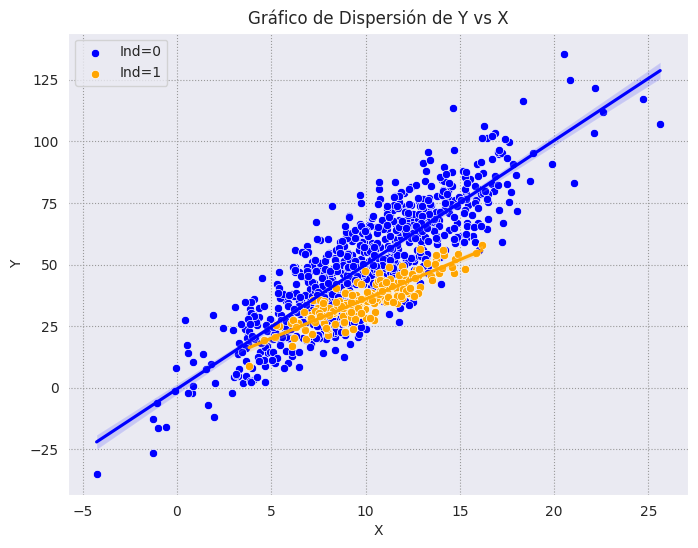

In [12]:
x_values = data1['X']
y_values = data1['Y']
ind_values = data1['Ind']
data_ind_0 = data1[data1['Ind'] == 0]
data_ind_1 = data1[data1['Ind'] == 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_ind_0['X'], y=data_ind_0['Y'], color='blue', label='Ind=0')
sns.regplot(x=data_ind_0['X'], y=data_ind_0['Y'], scatter=False, color='blue')
sns.scatterplot(x=data_ind_1['X'], y=data_ind_1['Y'], color='orange', label='Ind=1')
sns.regplot(x=data_ind_1['X'], y=data_ind_1['Y'], scatter=False, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión de Y vs X')
plt.legend()
plt.show()

El gráfico de dispersión muestra que la variable X asume diferentes pendientes cuando se realiza discriminación entre 0 y 1, esto es una muestra de que estamos frente a un modelo con interacción en donde la variable categórica afecta el comportamiento de Y. Por lo tanto, la tasa media de cambio de Y ante X es distinta cuando realizo discriminacion de la categorica.

# Modelo con Interacción

In [13]:
data1['Interaction'] = data1['X'] * data1['Ind']
X_interact = data1[['X','Interaction']]
y = data1['Y']
X_interact = sm.add_constant(X_interact)
modelo_interact = sm.OLS(y, X_interact).fit()
print(modelo_interact.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1620.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          6.34e-314
Time:                        15:23:08   Log-Likelihood:                -3788.2
No. Observations:                1000   AIC:                             7582.
Df Residuals:                     997   BIC:                             7597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1611      0.964     -0.167      

## Interpretación:


### Bondad de Ajuste:

R-squared: El R-squared es 0.765, lo que significa que el modelo explica el 76.5% de la variabilidad en la variable de respuesta 'Y'.

Adj. R-squared: El R-squared ajustado es 0.764, que tiene en cuenta el número de predictores en el modelo.

F-statistic: El valor del estadístico F es 1620, y el p-value asociado es extremadamente pequeño (6.34e-314), indicando que al menos una de las variables predictoras es significativa en la predicción de 'Y'.

### Pruebas de Diagnóstico:

Prob(Omnibus): 0.137, que es mayor que 0.05. Esto sugiere que los residuos no están normalmente distribuidos, pero no hay una violación significativa.

Prob(JB): 0.109, lo cual es mayor que 0.05. Similar a la prueba Omnibus, esto sugiere que los residuos no siguen una distribución normal.

Durbin-Watson: 1.986, cerca de 2, sugiriendo que no hay una autocorrelación sustancial en los residuos.

### Coeficientes:

const (intercepto): El coeficiente asociado con el intercepto es -0.1611, pero no es estadísticamente significativo (p-value = 0.867). Esto sugiere que no hay evidencia suficiente para afirmar que el valor medio de 'Y' es diferente de cero cuando todas las demás variables son cero.

X: El coeficiente asociado con 'X' es 5.0120, y es estadísticamente significativo (p-value < 0.05). Indica que, manteniendo constante la variable 'Interaction', un incremento de una unidad en 'X' se asocia con un aumento de 5.0120 unidades en 'Y'.

Interaction: El coeficiente asociado con 'Interaction' es -1.4219, y también es estadísticamente significativo (p-value < 0.05). Esto sugiere que hay un efecto de interacción entre 'X' e 'Ind'. El valor negativo indica que la relación entre 'X' e 'Y' se modifica por la presencia de 'Ind'.

Interpretación del Intercepto (const):
El intercepto no es significativo, lo que indica que no hay evidencia suficiente para afirmar que el valor medio de 'Y' es diferente de cero cuando todas las demás variables son cero.

# Prueba de Shapiro-Wilk / Breusch-Pagan

### Shapiro-Wilk
Hipótesis Nula (H0): La hipótesis nula asume que los residuos siguen una distribución normal.
Resultado de la Prueba: Dado que el p-value (0.0215) es menor que el nivel de significancia de 0.05, hay evidencia suficiente para rechazar la hipótesis nula. Esto sugiere que los residuos no siguen una distribución normal.

### Breusch-Pagan

Hipótesis Nula (H0): La hipótesis nula asume homocedasticidad, es decir, que la varianza de los residuos es constante.
Resultado de la Prueba: Dado que el p-value es prácticamente cero, hay evidencia suficiente para rechazar la hipótesis nula. Esto sugiere que hay heterocedasticidad en los residuos.

In [14]:
from scipy.stats import shapiro
residuos = modelo_interact.resid
stat, p_value = shapiro(residuos)
print(f'p-value de la prueba de Shapiro-Wilk: {p_value}')

p-value de la prueba de Shapiro-Wilk: 0.02152867242693901


In [15]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuos = modelo_interact.resid
exog_het = modelo_interact.model.exog
_, p_value, _, _ = het_breuschpagan(residuos, exog_het)
print(f'p-value de la prueba de Breusch-Pagan: {p_value}')

p-value de la prueba de Breusch-Pagan: 4.205804595796627e-18


# Punto 2A

In [16]:
df = data2
data2.describe()

,Y,X
count,1000.000000,1.000000e+03
mean,9.445622,7.234805e-02
std,3.908189,9.753985e-02
min,-12.073239,1.343729e-08
25%,7.411486,8.450417e-03
50%,10.072134,3.655172e-02
75%,12.082546,9.992523e-02
max,17.838788,9.397465e-01


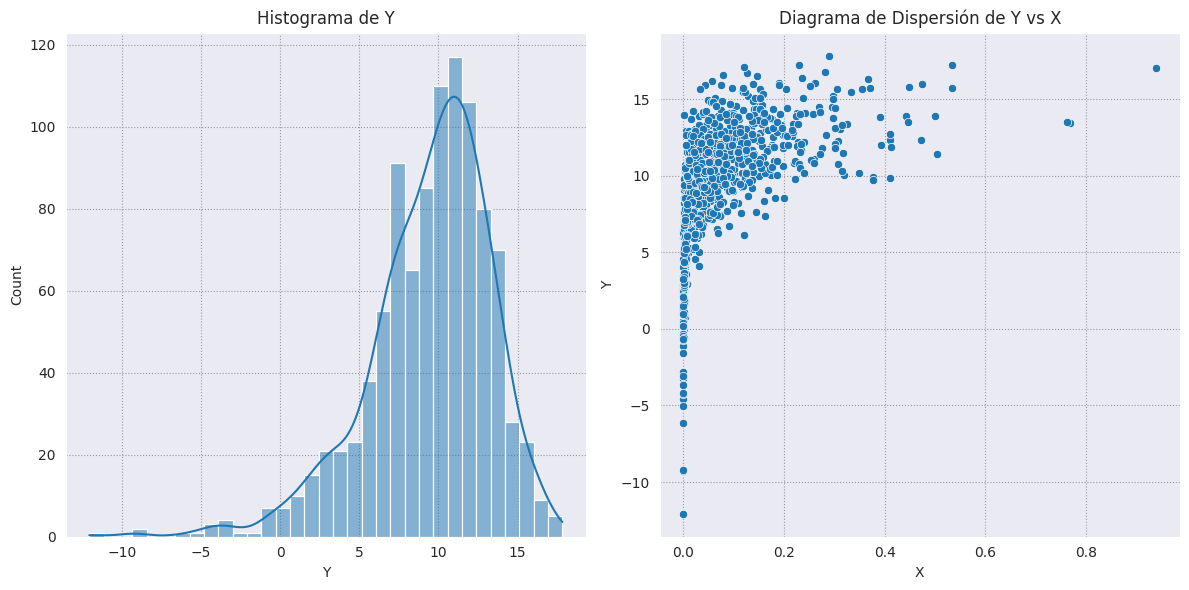

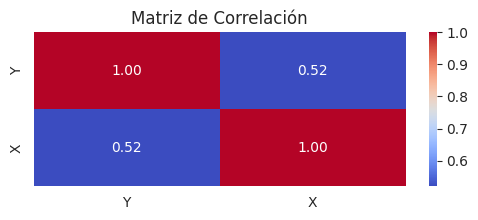

In [17]:
# Análisis Exploratorio
df = pd.DataFrame(data2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Y'], kde=True)
plt.title('Histograma de Y')

plt.subplot(1, 2, 2)
sns.scatterplot(x='X', y='Y', data=df)
plt.title('Diagrama de Dispersión de Y vs X')

plt.tight_layout()
plt.show()

correlation_matrix = df[['Y', 'X']].corr()
plt.figure(figsize=(6, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

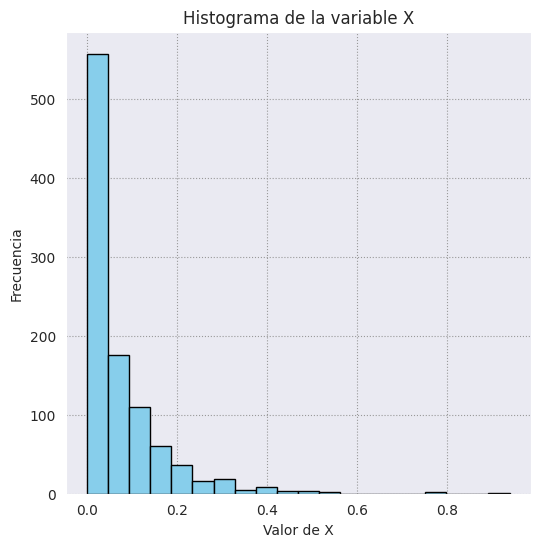

In [18]:
plt.figure(figsize=(6, 6))
plt.hist(df['X'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable X')
plt.xlabel('Valor de X')
plt.ylabel('Frecuencia')
plt.show(close=None, block=None)

## Justificación:

Después de realizar el análisis univariado y bivariado se observa que; no se encuentra evidencia de una relación lineal entre la variable dependiente (Y) y la variable independiente, por lo cual plantear un modelo de regresión lineal sería una suposición injustificada. el sesgo en las variables puede afectar la apariencia de la relación lineal, por lo tanto habria que explorar diferentes enfoques, incluidas transformaciones de variables y modelos no lineales

In [22]:
import numpy as np
import pandas as pd

data2['Y'] = data2['Y'].replace(0, np.nan)
data2['X'] = data2['X'].replace(0, np.nan)
data2['log_Y'] = np.log(data2['Y'])
data2['log_X'] = np.log(data2['X'])

data2 = data2.dropna(subset=['log_Y', 'log_X'])

X_log = sm.add_constant(data2['log_X'])
modelo_log = sm.OLS(data2['log_Y'], X_log).fit()
print(modelo_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1650.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          6.87e-212
Time:                        15:29:28   Log-Likelihood:                -287.35
No. Observations:                 977   AIC:                             578.7
Df Residuals:                     975   BIC:                             588.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0144      0.023    130.895      0.0

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Punto 2B
# Interpretación

## Bondad de Ajuste:

R-squared y Adj. R-squared: Estos valores (0.629 y 0.628 respectivamente) indican la proporción de variabilidad en la variable de respuesta (logaritmo natural de Y) que es explicada por la variable independiente (logaritmo natural de X). En este caso, alrededor del 62.9% de la variabilidad en logaritmo natural de Y es explicada por el logaritmo natural de X.

Prob (F-statistic): Este valor (6.87e-212) sugiere que el modelo es estadísticamente significativo

## Coeficientes:

const: El coeficiente asociado con la constante (intercepto) es 3.0144. Esto significa que cuando logaritmo natural de X es cero, el logaritmo natural de Y es esperado que sea 3.0144.

log_X: El coeficiente asociado con logaritmo natural de X es 0.2296. Esto significa que un aumento de una unidad en
logaritmo natural de X está asociado, en promedio, con un aumento de 0.2296 unidades en logaritmo natural de Y.

## Pruebas de Diagnóstico

Prob(Omnibus) y Jarque-Bera (JB): Estas pruebas se utilizan para evaluar la normalidad de los residuos. Un valor bajo en Prob(Omnibus) y un valor alto en JB indican que los residuos no siguen una distribución normal. En este caso, parece haber desviaciones de la normalidad.

Durbin-Watson: Este estadístico prueba la autocorrelación de los residuos. Un valor cercano a 2 sugiere que no hay autocorrelación significativa. En este caso, el valor es aproximadamente 1.984, lo que sugiere que no hay fuerte autocorrelación.

Cond. No.: El número de condición (9.46) es una medida de la multicolinealidad. Valores mayores que 20 pueden indicar problemas de multicolinealidad, pero aquí no parece ser un problema significativo.

En general, el modelo indica que hay una relación significativa entre el logaritmo natural de X y el logaritmo natural de Y.

## Pruena Shapiro - Wilk/Breusch-Pagan

Shapiro - Wilk: En el contexto de la prueba de Shapiro-Wilk, un valor p muy pequeño generalmente sugiere evidencia en contra de la hipótesis nula de que los datos siguen una distribución normal. En otras palabras, si el valor p es muy bajo, hay evidencia para rechazar la hipótesis de normalidad.

Breusch-Pagan:
En tu caso, el valor p (6.173801353515408e-24) es extremadamente pequeño, lo que sugiere fuerte evidencia en contra de la homocedasticidad. Por lo tanto, podrías concluir que hay heterocedasticidad en los errores del modelo.

In [23]:
from scipy.stats import shapiro
residuos = modelo_log .resid
stat, p_value = shapiro(residuos)
print(f'p-value de la prueba de Shapiro-Wilk: {p_value}')

p-value de la prueba de Shapiro-Wilk: 1.7848847056512797e-28


In [24]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuos = modelo_log .resid
exog_het = modelo_log .model.exog
_, p_value, _, _ = het_breuschpagan(residuos, exog_het)
print(f'p-value de la prueba de Breusch-Pagan: {p_value}')

p-value de la prueba de Breusch-Pagan: 6.173801353514693e-24


##Punto 4

In [ ]:
#Cargar los datos
pub = pd.read_csv("/content/publicidad.csv",sep=',',names=None,index_col=None,skipinitialspace=True)

In [ ]:
pub.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
pub.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
pub = pub.drop("Unnamed: 0",axis=1)

array([[<Axes: xlabel='TV', ylabel='TV'>,
        <Axes: xlabel='Radio', ylabel='TV'>,
        <Axes: xlabel='Newspaper', ylabel='TV'>,
        <Axes: xlabel='Sales', ylabel='TV'>],
       [<Axes: xlabel='TV', ylabel='Radio'>,
        <Axes: xlabel='Radio', ylabel='Radio'>,
        <Axes: xlabel='Newspaper', ylabel='Radio'>,
        <Axes: xlabel='Sales', ylabel='Radio'>],
       [<Axes: xlabel='TV', ylabel='Newspaper'>,
        <Axes: xlabel='Radio', ylabel='Newspaper'>,
        <Axes: xlabel='Newspaper', ylabel='Newspaper'>,
        <Axes: xlabel='Sales', ylabel='Newspaper'>],
       [<Axes: xlabel='TV', ylabel='Sales'>,
        <Axes: xlabel='Radio', ylabel='Sales'>,
        <Axes: xlabel='Newspaper', ylabel='Sales'>,
        <Axes: xlabel='Sales', ylabel='Sales'>]], dtype=object)

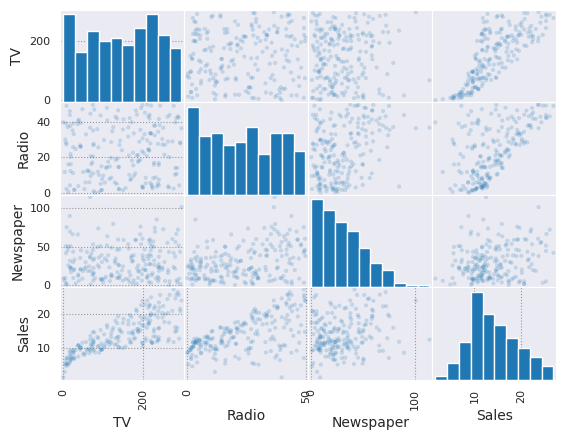

In [ ]:
## 1. Gráficar la variable respuesta vs las variables predictoras
pd.plotting.scatter_matrix(pub, alpha=0.2)

#Interpretación del gráfico

* Sales vs Newspaper: En el gráfico se observa que no existen patrones de relación y dependencia entre las variables, los datos
se encuentran dispersos entre los valores de la variable newspaper y Sales. Adicionalmente, se observa una concentración de los valores de las ventas cuando el de Newspaper es menor a 50.

* Sales vs Radio: La correlación entre las dos variables se observa directamente proporcional, es decir, que a incrementos en una unidad de la variable Radio, tambien incrementa la variable Sales. Sin embargo, no se puede afirmar claramente que sea una relación lineal.

* Sales vs TV: Entre estas dos varibles se observa una correlación positiva y de una manera mas clara que la anterior comparación, la correlación no es lineal.

<Axes: >

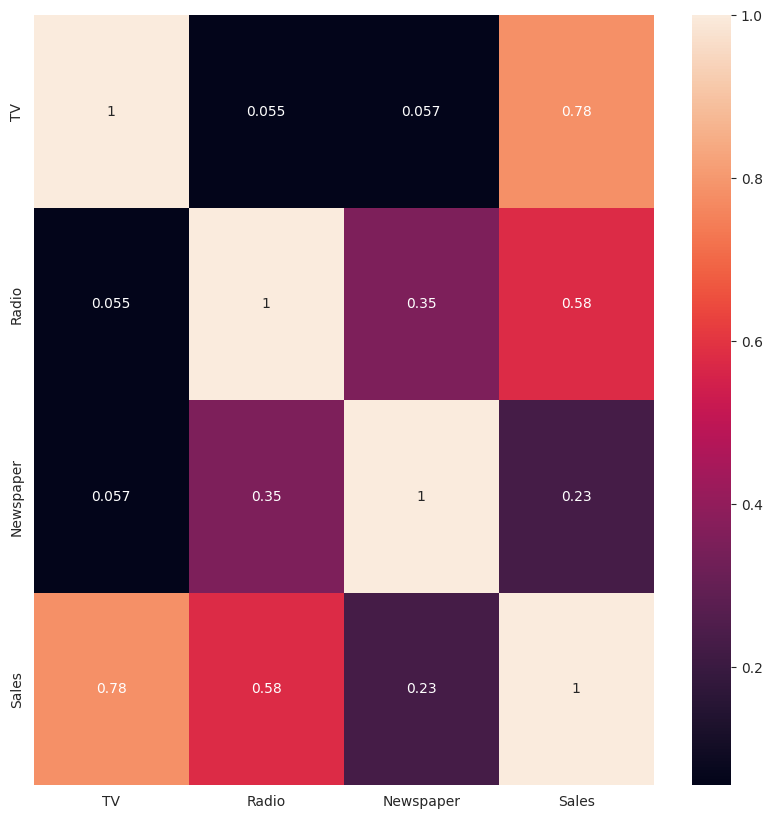

In [ ]:
#2 Calcular el coeficiente de correlación mediante un mapa de calor

plt.figure(figsize=(10, 10))
sns.heatmap(pub.corr(), annot = True)

### Interpretación de las estructuras de dependencia:

Dando continuidad a lo observado en los gráficos de dispersión de la variable dependiente Sales versus las variables independientes (Newspaper, Radio, TV); en el gráfico de calor de las correlaciones se observa que entre las ventas y la publicidad por televisión tienen una correlación alta al ser un valor por encima de 0.7. Mientras que, entre las ventas y la publicidad en radio es moderada. Por último, como se visualizó en el scatter plot de las ventas y la publicidad en períodicos la correlación es débil.

Text(0.5, 1.0, 'Ventas en función de la Publicidad en TV')

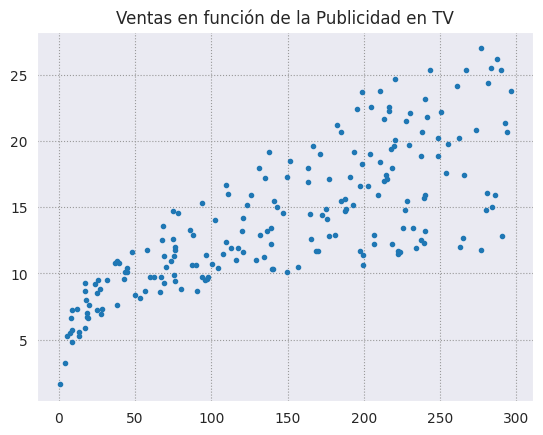

In [ ]:
Sales = pub["Sales"]
TV = pub["TV"]
plt.plot(TV, Sales, ".")
plt.title("Ventas vs la Publicidad en TV")

In [ ]:
# Modelo de regresión con la variable de mayor valor de correlación

import statsmodels.api as sm

### Ejecutando un modelo lineal (Regresion Simple)
X = sm.add_constant(TV)
model = sm.OLS(Sales, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.47e-42
Time:                        00:12:12   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [ ]:
b_0 = results.params[0]
b_1 = results.params[1]

## Ecuación de la recta

 $Sales = 7.0326 +  0.0475 TV$

## Interpretación del R2

#### R_squared =  0.612, el modelo lineal ajutado está explicando el 61.2 % de la variabilidad de las ventas dado la publicidad en TV. Es decir, que el modelo lineal ajustado no sería el mejor modelo para predecir las ventas en terminos de la publicidad en TV.

## Validación de los supuestos de los errores

#### 1. Independencia de los errores
###### El valor del estadístico de Durbin- Watson es de 1.935, como se encuentra entre el intervalo 1.5 <= DW <= 2.5, no hay suficiente evidencia para rechazar Ho, por lo tanto no hay autocorrelación de los errores.

#### 2. Normalidad de los errores
###### Comparando el p_value de la prueba de bonda de ajuste Jarque-Bera contra un nivel de significancia del 0.05, no hay suficiente evidencia para recharzar Ho. Por lo tanto, los errores tienen una distribución normal


#### 3. Media cero

In [ ]:
index_res = Sales.index
residuos  =  results.resid


Text(0.5, 1.0, 'Residuals vs. Index')

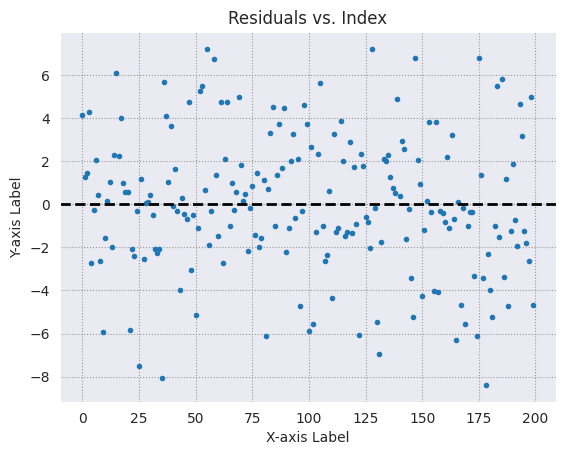

In [ ]:
plt.plot(index_res, residuos, ".")
plt.axhline(y=0, linestyle='--', color='black', lw=2)  # Add a horizontal dashed line at y = 0

# Add labels and a title if needed
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Residuals vs. Index')

In [ ]:
from scipy.stats import wilcoxon
test_wilcoxon = wilcoxon(residuos)
test_wilcoxon.statistic, test_wilcoxon.pvalue

(10049.0, 0.9990264452910839)

##### Comparando el p_value del test de wilcoxon con un nivel de significancia del 0.05, no hay suficiente evidencia para rechazar Ho: La E(errores) = 0

#### 4. Varianza constante

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

### H0: E_i son homocedasticos
### H1: E_i no son homocedasticos (Son heterosedasticos)
test = sms.het_breuschpagan(results.resid, results.model.exog)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Lagrange multiplier statistic', 48.037965662293615),
 ('p-value', 4.1804559077556965e-12),
 ('f-value', 62.591404771514306),
 ('f p-value', 1.7618451425695673e-13)]

##### El p_value de la prueba de breuschpagan comparado con un nivel de significancia de 0.05  el p_value es menor, por lo tanto se rechaza la  
Ho: Los errores son homocedasticos, este supuesto no se cumple.

In [ ]:
new_data = np.array([[1,5],[1,6]])
new_data = sm.add_constant(new_data)

In [ ]:
# Calcular el intervalo de confianza de predicción para las nuevas observaciones
predicciones = results.get_prediction(new_data)
intervalo_confianza_prediccion = predicciones.conf_int(alpha=0.05)  # 0.05 corresponde a un nivel de confianza del 95%
print(intervalo_confianza_prediccion)

[[6.3902261  8.15032741]
 [6.44230239 8.19332439]]


El intervalo de confianza para la predición Sales dado 5 anuncios en TV es:
$IC_{0.95} = [6.3902261, 8.15032741]$

## Punto 5

### Cargar los datos del archivo “Concrete_Data.xls” y examinar las características del conjunto de datos.

 * Se carga el dataset
 * Se elimina la variable Age, que no se considera en la estimación.

In [ ]:
concrete_data = pd.read_excel('/content/Concrete_Data.xls')
concrete.drop('Age (day)', axis = 1, inplace = True)

NameError: ignored

* Se examina que todas las variables tienen el tipo correcto y ninguna columna tiene datos faltantes.

In [ ]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Concrete compressive strength(MPa, megapascals)        1030 non-null   float64
dtypes: float64(8)
memory usage: 64.5 KB


***Con respecto a las estadísticas descriptivas se encuentra que:***
 * El valor promedio de Cemento es de 281 y su valor mediano es de 272.
 * El valor promedio de Escoria es de 73 y su valor mediano es de 22.
 * El valor promedio de la Ceniza volante es de 54 y su valor mediano es de 0. Este valor debe revisarse si es una inconsistencia en el dataset o efectivamente es correcto que al menos el 50% sean cero.
 * El valor promedio del Agua es de 181 y su valor mediano es de 185.
 * El valor promedio del Superplastificante es de 6.2 y su valor mediano es de 6.35.
 * El valor promedio del Agregado grueso es de 973 y su valor mediano es de 968.
 * El valor promedio del Agregado fino es de 773 y su valor mediano es de 779.
 * Por último la variable respuesta Resistencia a la compresión del concreto tiene un valor promedio de 36 y un valor mediano de 34.

In [ ]:
round(concrete.describe()[np.array([False, True,True,True,True,True,True,True])].T,2) ## Summary de las variables sin el conteo, ya sabemos que existen 1030 observaciones.

,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),281.17,104.51,102.00,192.38,272.90,350.00,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),73.90,86.28,0.00,0.00,22.00,142.95,359.4
Fly Ash (component 3)(kg in a m^3 mixture),54.19,64.00,0.00,0.00,0.00,118.27,200.1
Water (component 4)(kg in a m^3 mixture),181.57,21.36,121.75,164.90,185.00,192.00,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),6.20,5.97,0.00,0.00,6.35,10.16,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),972.92,77.75,801.00,932.00,968.00,1029.40,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),773.58,80.18,594.00,730.95,779.51,824.00,992.6
"Concrete compressive strength(MPa, megapascals)",35.82,16.71,2.33,23.71,34.44,46.14,82.6


* Se modifica el nombre de las variable para mejor visualización de gráficos, puesto que los nombres son muy largos.

In [ ]:
concrete.columns = ['Cement','Blast Furnace Slag','Fly Ash','Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate', 'Concrete compressive strength']

* Histogramas

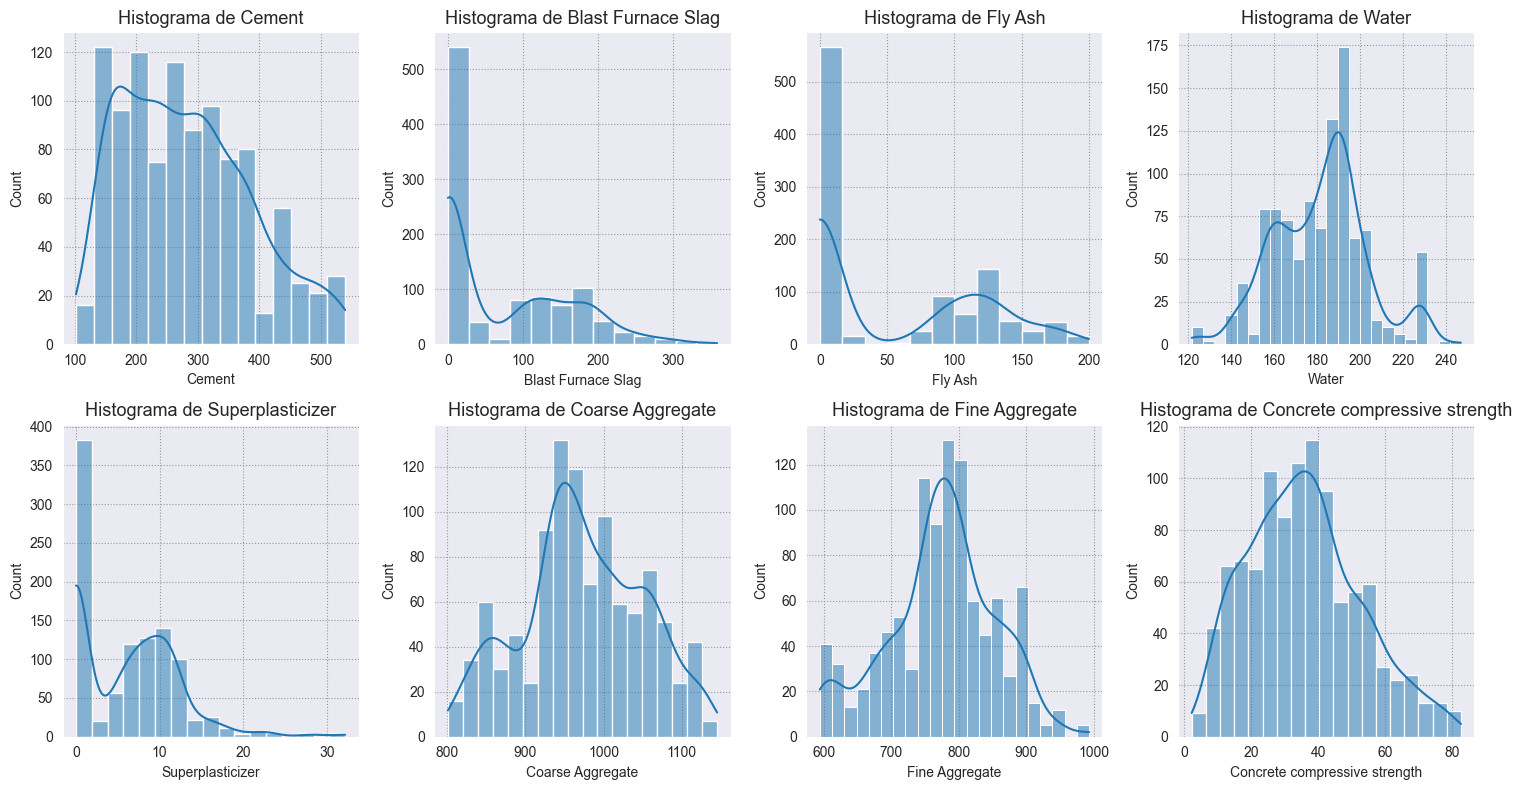

In [ ]:
f = plt.figure( figsize = (15,8))
for i, j  in enumerate(['Cement','Blast Furnace Slag','Fly Ash','Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate', 'Concrete compressive strength']):
    f.add_subplot(2,4,i + 1)
    sns.histplot(concrete[j], kde = True)
    plt.title(f'Histograma de {j}', size = 13)
f.tight_layout()

### Realizar un análisis exploratorio de los datos para entender la relación entre las variables predictoras y la variable respuesta

 * Graficamente no se observa ninguna tendencia lineal con las variables, a excepción de la variable ***Cemento*** donde pareciese existir un patrón de dependencia positivo.

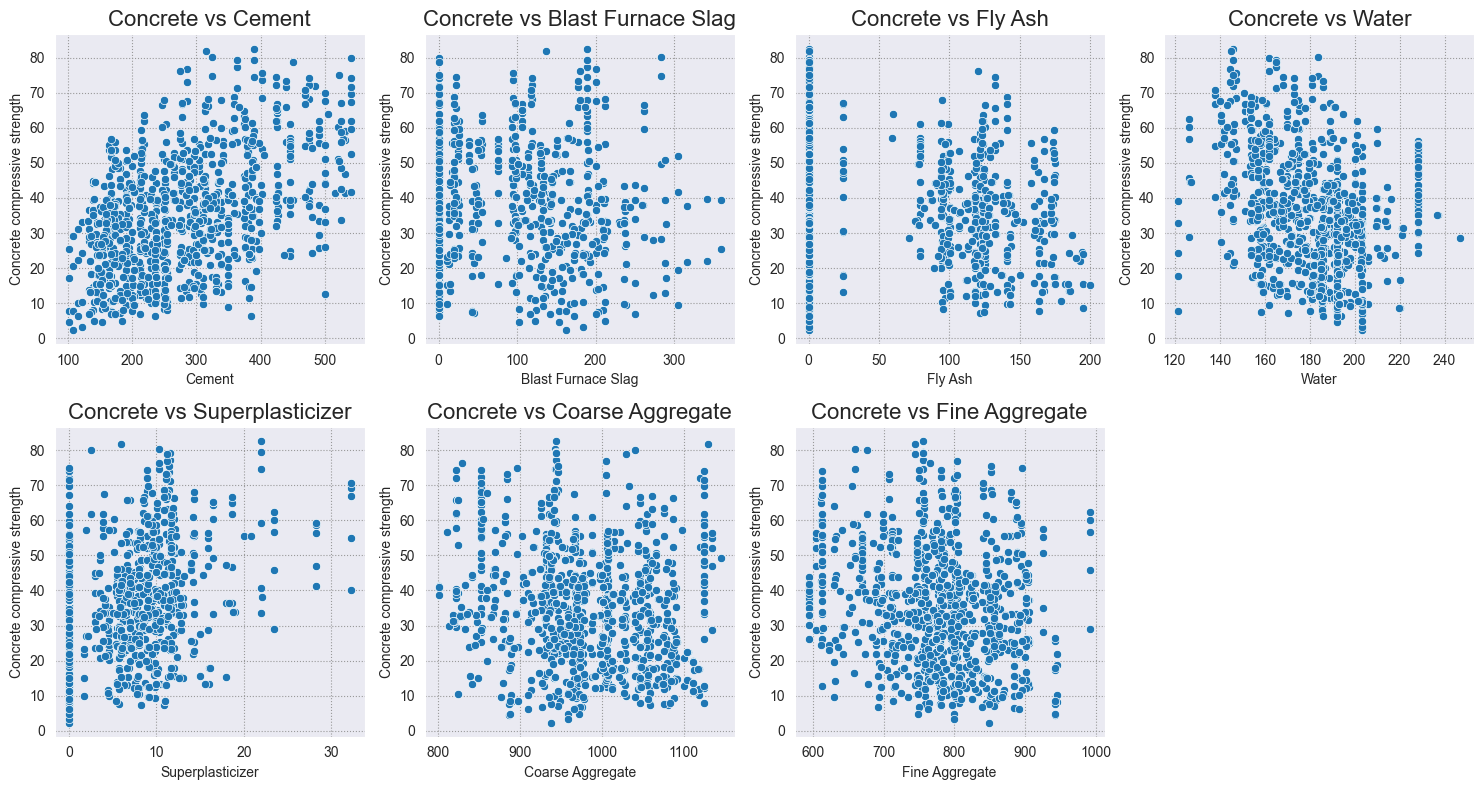

In [ ]:
f = plt.figure( figsize = (15,8))
for i, j  in enumerate(['Cement','Blast Furnace Slag','Fly Ash','Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate']):
    f.add_subplot(2,4,i + 1)
    sns.scatterplot(data = concrete, x = j, y = 'Concrete compressive strength')
    plt.title(f'Concrete vs {j}', size = 16)
f.tight_layout()

* Para cuantificar los niveles de dependencia entre las variables se calculan la correlaciones por los métodos de Pearson, Spearman y Kendall

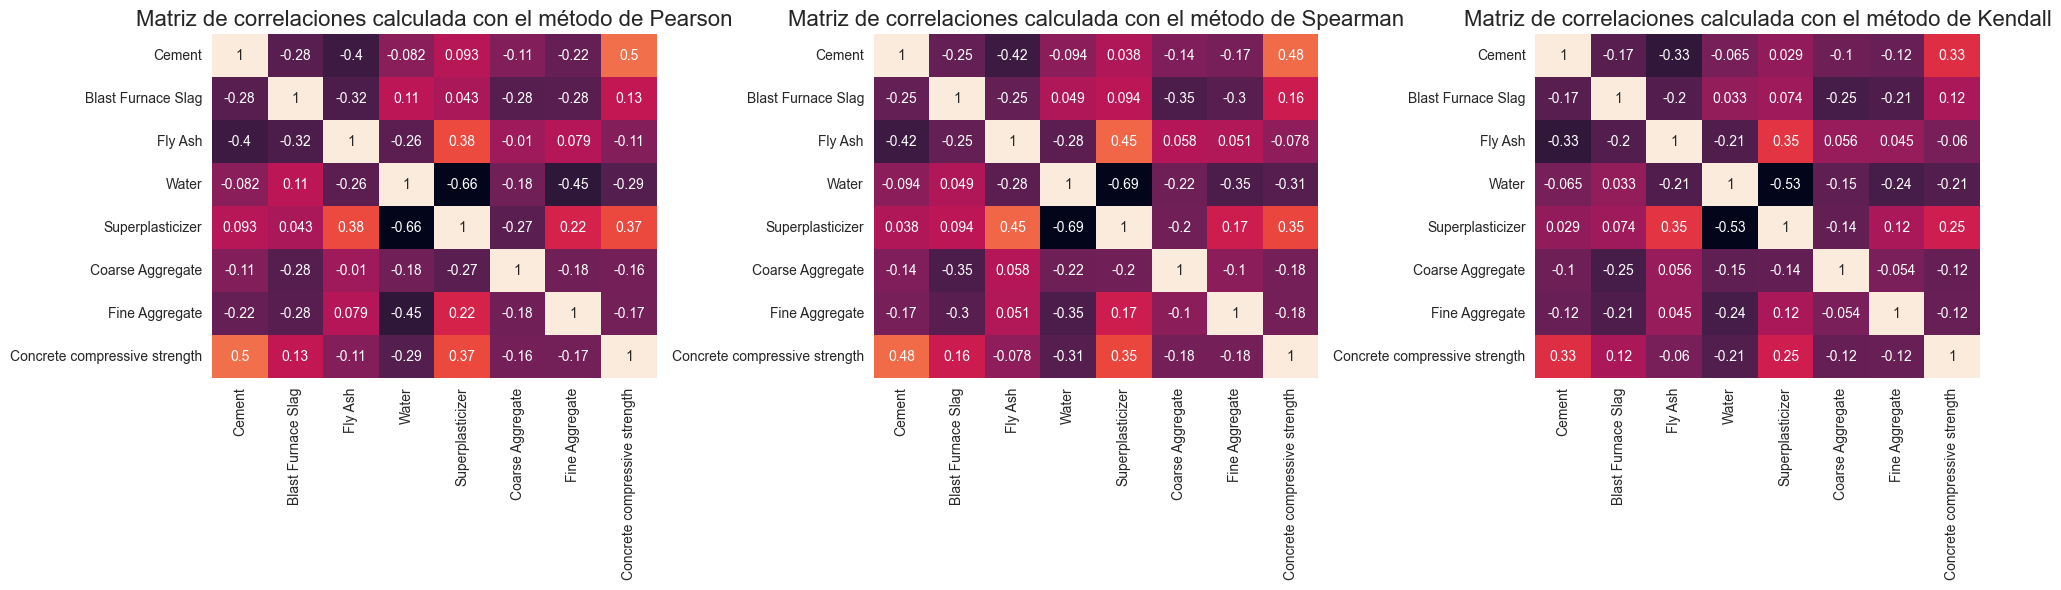

In [ ]:
f1 = plt.figure(figsize = (20,6))
for i, j in enumerate(['pearson','spearman','kendall']):
    f1.add_subplot(1,3, i + 1)
    sns.heatmap(concrete.corr(method=j), annot = True, cbar = False)
    plt.title(f'Matriz de correlaciones calculada con el método de {j.capitalize()}', size = 16)
f1.tight_layout()

Con base a la matriz de correlaciones calculada por los distintos métodos, se encuentra lo siguiente:
> Correlación de Pearson ($\rho$):
> * Sólo la variable ***Cemento*** alcanza una relación positiva y moderada con la variable dependiente, el resto de variables tienen relación baja y la relación con la variable ***Fly Ash*** es casi cero.

> Correlación de Spearman ($\rho$):
> * Las correlaciones tienen valores muy similares a las calculadas con Pearson, la única variable que alcanza una relación moderada es ***Cemento*** y el resto se mantienen bajas.

> Correlación de Kendall ($\tau$):
> * De las correlaciones calculadas por Kendall ninguna variable alcanza a tener una relación moderada con la variable dependiente.

### Entrenar un modelo de regresión lineal múltiple utilizando el conjunto de datos y evalúe si hay significancia en el modelo.

* Se definen la variable respuesta y predictoras.

In [ ]:
y = concrete['Concrete compressive strength']
x = concrete.drop('Concrete compressive strength', axis = 1)

* Del siguiente resumen del modelo con todas las variables contempladas se puede encontrar que:

 >* Los coeficientes de las variables en su conjunto sí son significativos (Prob (F-statistic) < 0.05), es decir, sí existe modelo lineal.
 >* Para un nivel de confianza del 5% los coeficientes que no fueron significativos fueron los de las variables Coarse Agreggate y Fine Aggregate.
 >* El estadístico del DW se sale del intervalo de no rechazo de H0, lo que permite inferir que los errores no son independientes.
 >* Con respecto a la normalidad de los errores, el estadístico de prueba Jarque-Bera indica que los errores no se distribuyen de manera normal.
 >* El R2 fue de 0.449. Lo que implica que un 44.9% de la variabilidad de la variable dependiente es explicada por las variables regresoras.
 >* El número de condición es grande lo que puede indicar de multicolinealidad en las variables regresoras.

In [ ]:
X = sm.add_constant(x)
modelo1 = sm.OLS(y, X)
resultado1 = modelo1.fit()
resultado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete compressive strength   R-squared:                       0.449
Model:                                       OLS   Adj. R-squared:                  0.445
Method:                            Least Squares   F-statistic:                     118.8
Date:                           Sat, 07 Oct 2023   Prob (F-statistic):          1.80e-127
Time:                                   14:01:02   Log-Likelihood:                -4054.6
No. Observations:                           1030   AIC:                             8125.
Df Residuals:                               1022   BIC:                             8165.
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4192     31.786      0.108      0.914     -58.954      65.792
Cement                 0.1088      0.010     10.729      0.000       0.089       0.129
Blast Furnace Slag     0.0800      0.012      6.637      0.000       0.056       0.104
Fly Ash                0.0567      0.015      3.789      0.000       0.027       0.086
Water                 -0.1014      0.048     -2.112      0.035      -0.196      -0.007
Superplasticizer       0.3572      0.112      3.195      0.001       0.138       0.577
Coarse Aggregate       0.0086      0.011      0.767      0.443      -0.013       0.031
Fine Aggregate         0.0008      0.013      0.064      0.949      -0.024       0.026
==============================================================================
Omnibus:                       14.056   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.733
Skew:                           0.023   Prob(JB):                       0.0127
Kurtosis:                       2.551   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analizar la significancia estadística de las variables predictoras y construir un modelo de regresión lineal múltiple reducido con las variables significativas. Revise su desempeño con respecto al modelo completo revisando el Adj − R2 y los criterios de información de Akaike y de Bayes (AIC y BIC).

* Variables significativas en el modelo ajustado con todas las variables

In [ ]:
vars_signf = resultado1.pvalues[resultado1.pvalues < 0.05].index.values ## Se obtiene el nombre de las variables que fueron significativas
x = concrete[vars_signf]
y = concrete['Concrete compressive strength']

* Modelos ajustado

In [ ]:
X = sm.add_constant(x)
model_adj = sm.OLS(y, X)
resultado2 = model_adj.fit()
resultado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete compressive strength   R-squared:                       0.448
Model:                                       OLS   Adj. R-squared:                  0.445
Method:                            Least Squares   F-statistic:                     166.1
Date:                           Sat, 07 Oct 2023   Prob (F-statistic):          2.44e-129
Time:                                   14:15:43   Log-Likelihood:                -4055.4
No. Observations:                           1030   AIC:                             8123.
Df Residuals:                               1024   BIC:                             8152.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 17.1656      4.990      3.440      0.001       7.373      26.958
Cement                 0.1067      0.005     21.021      0.000       0.097       0.117
Blast Furnace Slag     0.0770      0.006     13.006      0.000       0.065       0.089
Fly Ash                0.0544      0.009      5.905      0.000       0.036       0.072
Water                 -0.1204      0.025     -4.886      0.000      -0.169      -0.072
Superplasticizer       0.2995      0.101      2.964      0.003       0.101       0.498
==============================================================================
Omnibus:                       13.259   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.434
Skew:                           0.036   Prob(JB):                       0.0147
Kurtosis:                       2.563   Cond. No.                     4.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* ***Desempeño del modelo completo vs el modelo reducido.***


|Métrica| Modelo completo | Modelo reducido |
|:----:| :-----------: | :-----------: |
| AIC | 8125.2 |8122.8 |
| BIC | 8164.7 |8152.5 |
|R2-Adj | 0.445|0.445 |


<br>

> * El modelo reducido es preferible al modelo completo puesto que tiene tanto un AIC como un BIC menor al modelo completo.
> * Con respecto R2 ajustado es igual para ambos modelos.



### Valide los supuestos del modelo ($ε_i \overset{\text{iid}}{\sim} N(0, σ2)$) y en caso de no cumplir alguno, proponga una solución. Evalúe la conveniencia de usar un enfoque robusto en este caso.


**Validación de los supuestos sobre los residuales del modelo reducido $\hat{\epsilon_i}$**
 > *Autocorrelación serial*
 >    *  Prueba DW: El estadístico DW (1.211) recae por la zona de rechazo de H0, lo que implica que los errores no son independientes.
 >    * Prueba gráfica: De manera gráfica se plotean los $\hat{\epsilon_i}$ vs $\hat{\epsilon_{i-1}}$ y se encuentra cierto patrón de asociación positiva lo que ya había confirmado la prueba DW.

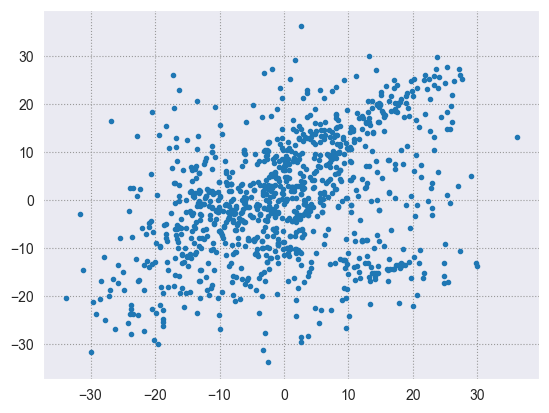

In [ ]:
## Gráfica de autocorrelación de primer orden de los errores
plt.plot(resultado2.resid[:-1],resultado2.resid[1:],'.')
plt.show()

 >*Distribución normal*
 >    * Jarque-Bera : El p_value (0.014) de este estadístico es menor al nivel de significancia por lo que se rechaza la hipótesis nula de normalidad de los errores.
 >    * Graficamente en el QQPlot se ve que en el centro los errores siguen la linea de la distribución teórica, pero en la colas se desvían.
 >    * Los errores tienen media cero, lo que se comprueba con la prueba ttest_1samp, en la cual no se rechaza la H0 de que $\mu= 0$

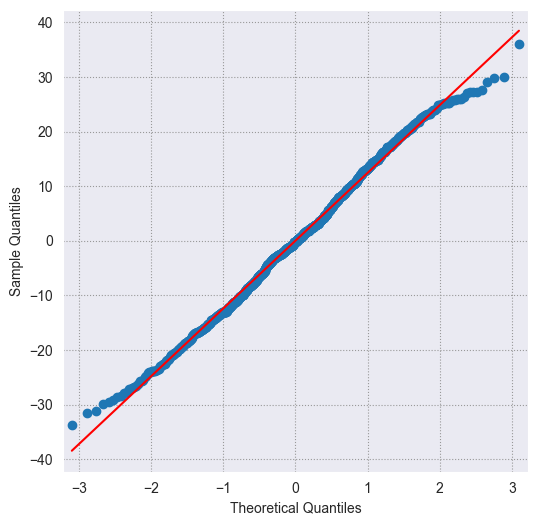

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
qqplot(resultado2.resid, line = 's', ax = ax)
plt.show()

In [ ]:
kstest(resultado2.resid, 'norm')

KstestResult(statistic=0.41786533375624446, pvalue=1.94401256204065e-163, statistic_location=-2.281451227098188, statistic_sign=1)

* Los errores tienen media cero. ***Este supuesto sí se cumple.***

In [ ]:
ttest_1samp(resultado2.resid, popmean = 0)[1]

0.9999999999999298

 > *Homocedasticidad*
 >    * El p_value (1.55 e-13) asociado al estadístico de Breusch-Pagan es menor al nivel de significancia por lo que se rechaza la hipótesis nula de varianza constante de los errores.

In [ ]:
### Breusch Pagan Test
sm.stats.diagnostic.het_breuschpagan(resultado2.resid, resultado2.model.exog)[-1] ## el p_value es el último valor

1.553691178344316e-13

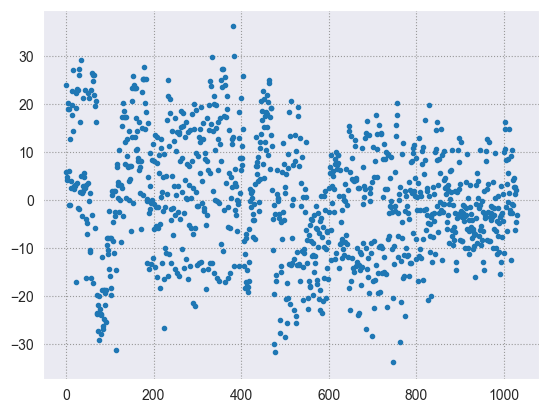

In [ ]:
plt.plot(resultado2.resid,'.')
plt.show()

* En las anteriores celdas se encontró que se violan los supuestos sobre los errores: la autocorrelación, la normalidad y la homocedasticidad.
* Además sobre las variables independientes se encontró multicolinealidad. Para esto se va a calcular el Factor de Inflación de Varianza y eliminar la variable que mayor contribución tenga.

In [ ]:
def calc_vif(X): ## Se define la función para calcular la VIF
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return (vif)

In [ ]:
calc_vif(x).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,Water,19.731307
0,Cement,14.231885
4,Superplasticizer,3.840886
2,Fly Ash,3.828291
1,Blast Furnace Slag,2.993109


* Obtenemos el nombre de cuál es la variable que más infla la varianza, se elimina y se calcula de nuevo el modelo.

In [ ]:
vble_most_vif = calc_vif(x).sort_values(by = 'VIF').iloc[-1,0]

* El modelo sigue teniendo problemas de multicolinealidad.

In [ ]:
X = sm.add_constant(x)
X.drop(labels = vble_most_vif , axis = 1, inplace = True) ## Se elimina la variable que más VIF tenía.
modelo_adj3 = sm.OLS(y, X)
resultado3 = modelo_adj3.fit()
resultado3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete compressive strength   R-squared:                       0.435
Model:                                       OLS   Adj. R-squared:                  0.433
Method:                            Least Squares   F-statistic:                     197.2
Date:                           Sat, 07 Oct 2023   Prob (F-statistic):          2.08e-125
Time:                                   14:31:22   Log-Likelihood:                -4067.3
No. Observations:                           1030   AIC:                             8145.
Df Residuals:                               1025   BIC:                             8169.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.3638      1.930     -2.779      0.006      -9.151      -1.577
Cement                 0.1047      0.005     20.466      0.000       0.095       0.115
Blast Furnace Slag     0.0712      0.006     12.139      0.000       0.060       0.083
Fly Ash                0.0500      0.009      5.398      0.000       0.032       0.068
Superplasticizer       0.6070      0.080      7.591      0.000       0.450       0.764
==============================================================================
Omnibus:                       16.189   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.033
Skew:                           0.122   Prob(JB):                      0.00402
Kurtosis:                       2.555   Cond. No.                     1.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* De acuerdo al resumen que nos muestra la regresión de la anterior celda sin la variable Water sigue existiendo multicolinealidad. Se calcula de nuevo el VIF para ver si sigue existiendo problemas de multicolinealidad y ninguna variable tiene un valor mayor a 5.

In [ ]:
calc_vif(x.drop(labels = 'Water', axis = 1)).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,Superplasticizer,2.815431
0,Cement,2.189177
2,Fly Ash,1.859278
1,Blast Furnace Slag,1.506098


* Se plantea realizar una trasnformación logarítmica en la variable dependiente y se examinará si se logran cumplir los supuestos en los residuales.

In [ ]:
X = sm.add_constant(x)
X.drop(labels = vble_most_vif , axis = 1, inplace = True)
modelo_ytransf = sm.OLS(np.log(y), X)
resultado_ytransf = modelo_ytransf.fit()
resultado_ytransf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete compressive strength   R-squared:                       0.381
Model:                                       OLS   Adj. R-squared:                  0.378
Method:                            Least Squares   F-statistic:                     157.5
Date:                           Sat, 07 Oct 2023   Prob (F-statistic):          4.69e-105
Time:                                   14:37:12   Log-Likelihood:                -600.93
No. Observations:                           1030   AIC:                             1212.
Df Residuals:                               1025   BIC:                             1237.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.1067      0.067     31.599      0.000       1.976       2.238
Cement                 0.0034      0.000     19.313      0.000       0.003       0.004
Blast Furnace Slag     0.0022      0.000     11.041      0.000       0.002       0.003
Fly Ash                0.0022      0.000      6.814      0.000       0.002       0.003
Superplasticizer       0.0157      0.003      5.701      0.000       0.010       0.021
==============================================================================
Omnibus:                       89.852   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.048
Skew:                          -0.754   Prob(JB):                     2.83e-25
Kurtosis:                       3.601   Cond. No.                     1.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* En este nuevo modelo se observa que el único supuesto que logra cumplirse es el de autocorrelación serial con un DW (1.518) que recae en el rango de 1.5 y 2.5, el resto de supuestos siguen sin cumplirse.

* Los errores no siguen una distribución normal, JB p_value (2.83e-25)

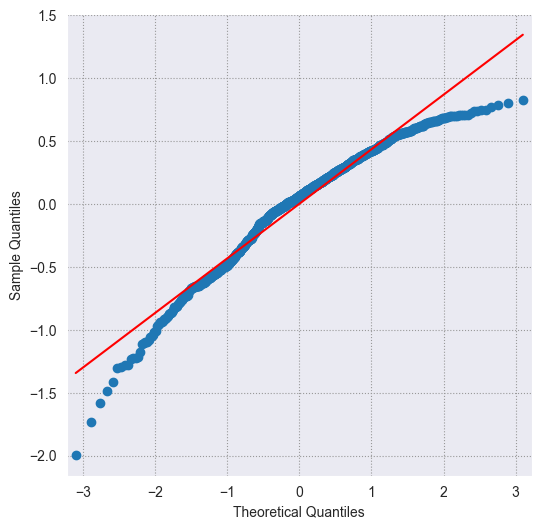

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
qqplot(resultado_ytransf.resid, line = 's', ax = ax)
plt.show()

* Se sigue violando el supuesto de homocedasticidad p_value(2.004e-12)

In [ ]:
### Breusch Pagan Test
sm.stats.diagnostic.het_breuschpagan(resultado_ytransf.resid, resultado_ytransf.model.exog)[-1] ## el p_value es el último valor

2.0041663399617903e-12

* Finalmente cuando fallan todos los supuestos del modelo clásico de regresión y no mejoran con transformaciones en las variables se opta por realizar una regresión robusta, que al penalizar puede mejorar la estimación. No obstante cabe aclarar que aunque la regresión robusta mejore la estimación, no va a corregir el problema de multicolinealidad de las variables independientes.

* **Regresión Robusta**

In [ ]:
X = sm.add_constant(x)
X.drop(labels = vble_most_vif , axis = 1, inplace = True)
modelo_robust = sm.RLM(y, X)
resultado_robust = modelo_robust.fit()
resultado_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Robust linear Model Regression Results                         
=========================================================================================
Dep. Variable:     Concrete compressive strength   No. Observations:                 1030
Model:                                       RLM   Df Residuals:                     1025
Method:                                     IRLS   Df Model:                            4
Norm:                                     HuberT                                         
Scale Est.:                                  mad                                         
Cov Type:                                     H1                                         
Date:                           Sat, 07 Oct 2023                                         
Time:                                   14:38:31                                         
No. Iterations:                               13                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.5170      2.068     -3.151      0.002     -10.571      -2.463
Cement                 0.1079      0.005     19.682      0.000       0.097       0.119
Blast Furnace Slag     0.0726      0.006     11.544      0.000       0.060       0.085
Fly Ash                0.0512      0.010      5.156      0.000       0.032       0.071
Superplasticizer       0.6002      0.086      7.003      0.000       0.432       0.768
======================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

* Finalmente se realiza una comparación de los coeficientes estimados por regresión y regresión robusta. Se observa que la regresión robusta le da una mayor importancia a los coeficientes de Cement, Blast Furnace Slag y Fly Ash pero le resta importancia al coeficiente de la variables Superplasticizer.

In [ ]:
betas = pd.DataFrame([resultado3.params.values,resultado_robust.params.values], columns = resultado_robust.params.index).T
betas.columns = ['OLS', 'OLS_Robusta']
betas

,OLS,OLS_Robusta
const,-5.363794,-6.516982
Cement,0.104719,0.107942
Blast Furnace Slag,0.071200,0.072577
Fly Ash,0.050047,0.051232
Superplasticizer,0.606965,0.600220
